In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans 
%matplotlib inline

### Load Data 

In [2]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [4]:
df = pd.read_csv(path, names = headernames)
df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h2 id="pre_processing">Pre-processing</h2


In [5]:
df = df.drop('Class', axis=1)
df.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Normalizing over the standard deviation

In [6]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)

<h2 id="modeling">Modeling</h2>


In [7]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_ 
#print(labels)

<h2 id="insights">Insights</h2>

We assign the labels to each row in dataframe.


In [8]:
df["Clus_km"] = labels
df.head(5)

,sepal-length,sepal-width,petal-length,petal-width,Clus_km
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


We can easily check the centroid values by averaging the features in each cluster.


In [9]:
df.groupby('Clus_km').mean()

,sepal-length,sepal-width,petal-length,petal-width
Clus_km,,,,
0,5.915094,2.754717,4.281132,1.350943
1,5.006000,3.418000,1.464000,0.244000
2,6.653191,3.004255,5.610638,2.042553


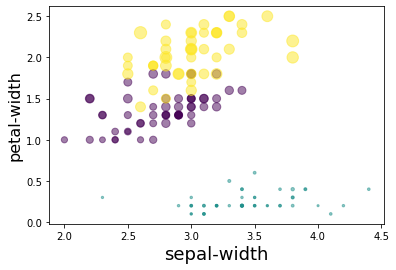

In [10]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 2], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('sepal-width', fontsize=18)
plt.ylabel('petal-width', fontsize=16)

plt.show()


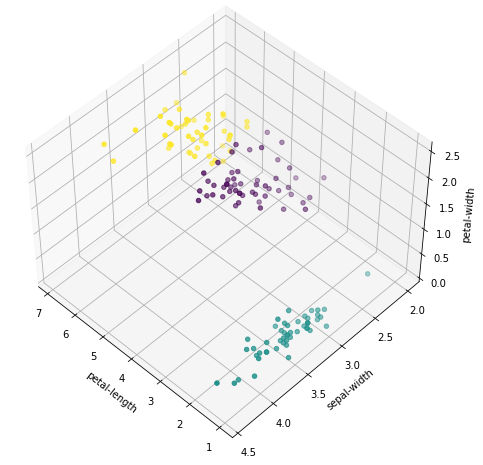

In [11]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('petal-length')
ax.set_ylabel('sepal-width')
ax.set_zlabel('petal-width')

ax.scatter(X[:, 1], X[:, 0], X[:, 2], c= labels.astype(np.float))
